Retrieves images from "raw_imgs" folder and stores them in "full_imgs". Retrieves spreadsheet listing VOIs and stores them in text file.

TODO: function to read existing vois, drop one class, then load the class back in. Requires that drm.load_imgs write to a DataFrame rather than an array

In [192]:
import cnn_builder as cbuild
import cnn_methods as cfunc
import config
import csv
import dr_methods as drm
import helper_fxns as hf
import importlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pyelastix
import time
import transforms as tr
import voi_methods as vm
%matplotlib inline

Using TensorFlow backend.


In [209]:
importlib.reload(cbuild)
importlib.reload(cfunc)
importlib.reload(config)
importlib.reload(hf)
importlib.reload(tr)
importlib.reload(vm)
importlib.reload(drm)
C = config.Config()

# Reload images and VOIs

In [ ]:
drm.load_all_vois(C)

In [186]:
for cls in C.classes_to_include:
    if not os.path.exists(C.full_img_dir + "\\" + cls):
        os.makedirs(C.full_img_dir + "\\" + cls)
    if not os.path.exists(C.orig_dir + cls):
        os.makedirs(C.orig_dir + cls)
    if not os.path.exists(C.aug_dir + cls):
        os.makedirs(C.aug_dir + cls)
    if not os.path.exists(C.crops_dir + cls):
        os.makedirs(C.crops_dir + cls)

In [232]:
#dims_df = pd.DataFrame(columns = ["AccNum", "x", "y", "z"])
dims_df = pd.read_csv(C.dims_df_path)
voi_df_art = pd.DataFrame(columns = ["Filename", "x1", "x2", "y1", "y2", "z1", "z2", "cls",
                                     "flipz", "real_dx", "real_dy", "real_dz", "id", "lesion_num"])
voi_df_ven = pd.DataFrame(columns = ["id", "x1", "x2", "y1", "y2", "z1", "z2"]) #voi_df_ven only contains entries where manually specified
voi_df_eq = pd.DataFrame(columns = ["id", "x1", "x2", "y1", "y2", "z1", "z2"]) #voi_df_ven only contains entries where manually specified
voi_dfs = [voi_df_art, voi_df_ven, voi_df_eq]
patient_info_df = pd.DataFrame(columns = ["MRN", "Sex", "AccNum", "AgeAtImaging", "cls"])

voi_df_art = pd.read_csv(C.art_voi_path)
voi_df_ven = pd.read_csv(C.ven_voi_path)
voi_df_eq = pd.read_csv(C.eq_voi_path)
voi_dfs = [voi_df_art, voi_df_ven, voi_df_eq]
dims_df = pd.read_csv(C.dims_df_path)

In [33]:
#intensity_df = pd.read_csv(C.int_df_path)

intensity_df = drm.get_intensities(C)
intensity_df.to_csv(C.int_df_path, index=False)

In [ ]:
xls_name = 'Z:\\Prototype1d.xlsx'
sheetnames = ['OPTN 5A', 'OPTN 5B', 'Cyst', 'Hemangioma', 'FNH', 'Cholangio', 'Colorectal', 'Adenoma']
cls_names = ['hcc', 'hcc', 'cyst', 'hemangioma', 'fnh', 'cholangio', 'colorectal', 'adenoma']
img_dirs = ["Z:\\"+x for x in ['OPTN5A', 'optn5b', 'simple_cysts', 'hemangioma', 'fnh', 'cholangio', 'colorectal', 'adenoma']]

for i in [sheetnames.index(x) for x in ['FNH']]:
    #drm.check_folders(img_dirs[i], xls_name, sheetnames[i], C)
    dims_df = drm.load_imgs(img_dirs[i], cls_names[i], xls_name, sheetnames[i], dims_df, C)
    #voi_dfs = load_vois(cls_names[i], xls_name, sheetnames[i], voi_dfs, dims_df, C)
    #drm.load_patient_info(img_dirs[i], cls_names[i], xls_name, sheetnames[i], patient_info_df, C)


Loading DCMs of type FNH
12943286 has already been saved. Skipping.
13185208 has already been saved. Skipping.
E100192709 has already been saved. Skipping.
E100215900 has already been saved. Skipping.
12611737 has already been saved. Skipping.
E101483270 has already been saved. Skipping.
E102341190 has already been saved. Skipping.
Found elastix version: 4.800 in 'c:\\program files\\elastix_v4.8\\elastix.exe'


In [32]:
voi_df_art, voi_df_ven, voi_df_eq = voi_dfs
voi_df_art.to_csv(C.art_voi_path, index=False)
voi_df_ven.to_csv(C.ven_voi_path, index=False)
voi_df_eq.to_csv(C.eq_voi_path, index=False)

In [30]:
dims_df.to_csv(C.dims_df_path, index=False)

In [229]:
#drm.delete_imgs(['12916368', 'E102556695'], 'hcc', C)
#drm.delete_imgs(0, cls, C, xls_name, sheetname)
drm.reload_img("E103354630", "fnh", C)


Loading DCM for ['E103354630']
Z:\fnh\E103354630\T1_AP [WinError 3] The system cannot find the path specified: 'Z:\\fnh\\E103354630\\T1_AP'


TypeError: 'NoneType' object is not iterable

# Generate cropped imgs

In [227]:
for acc_num in ['12943872']:
    vm.reload_accnum(acc_num, "fnh", C)


Loading VOIs for ['12943872']
.Overall time: 1.2368052005767822


In [ ]:
voi_df_art = pd.read_csv(C.art_voi_path)
voi_df_ven = pd.read_csv(C.ven_voi_path)
voi_df_eq = pd.read_csv(C.eq_voi_path)
intensity_df = pd.read_csv(C.int_df_path)

#C.classes_to_include = ['hcc', 'cholangio', 'colorectal', 'cyst', 'hemangioma', 'fnh']

In [103]:
with open(C.small_voi_path, 'r') as csv_file:
    reader = csv.reader(csv_file)
    small_vois = dict(reader)
for key in small_vois:
    small_vois[key] = [int(x) for x in small_vois[key][1:-1].split(', ')]

In [ ]:
small_vois = {}
small_vois = vm.extract_vois(small_vois, C, voi_df_art, voi_df_ven, voi_df_eq, intensity_df)

with open(C.small_voi_path, 'w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    for key, value in small_vois.items():
        writer.writerow([key, value])

In [184]:
# scaled imgs
t = time.time()
for cls in C.classes_to_include:
    for fn in os.listdir(C.crops_dir + cls):
        img = np.load(C.crops_dir + cls + "\\" + fn)
        unaug_img = vm.resize_img(img, C.dims, small_vois[fn[:-4]])
        np.save(C.orig_dir + cls + "\\" + fn, unaug_img)
print(time.time()-t)

for cls in C.classes_to_include:
    vm.save_all_vois(cls, C)

80.39607095718384


In [187]:
# augmented imgs
t = time.time()
for cls in C.classes_to_include:
    vm.parallel_augment(cls, small_vois, C, num_cores=3)
    print(cls, time.time()-t)

hcc 1008.090882062912
cholangio 1168.6908376216888
colorectal 1727.4936208724976
cyst 3536.7835915088654
hemangioma 4168.970490217209
fnh 5175.451043605804


# Plotting

In [217]:
voi_df_art = pd.read_csv(C.art_voi_path)
voi_df_art[voi_df_art["Filename"] == "12362250.npy"]

,Filename,x1,x2,y1,y2,z1,z2,cls,flipz,real_dx,real_dy,real_dz,id,lesion_num
246,12362250.npy,107,121,121,135,55,61,fnh,True,21.8750,21.8750,18.0,12362250_0,0
247,12362250.npy,63,73,61,71,53,59,fnh,True,15.6250,15.6250,18.0,12362250_1,1
248,12362250.npy,60,71,51,58,54,59,fnh,True,17.1875,10.9375,15.0,12362250_2,2
249,12362250.npy,118,132,141,152,52,57,fnh,True,21.8750,17.1875,15.0,12362250_3,3
250,12362250.npy,139,147,146,154,52,55,fnh,True,12.5000,12.5000,9.0,12362250_4,4
251,12362250.npy,115,123,147,154,48,52,fnh,True,12.5000,10.9375,12.0,12362250_5,5
252,12362250.npy,61,82,126,145,47,55,fnh,True,32.8125,29.6875,24.0,12362250_6,6


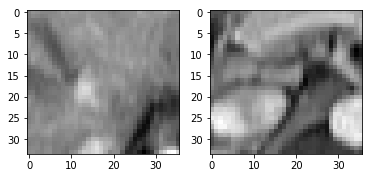

In [224]:
# can be used to determine if an image is flipped
cls = "fnh"
acc_num = '12943872'#acc_nums[0]
img_fn = acc_num + ".npy"
img = np.load(C.full_img_dir+"\\"+cls + "\\"+img_fn)
hf.plot_section(img, voi_df_art[voi_df_art["Filename"] == img_fn].iloc[0], flipz="both", pad=10)

In [228]:
# Cropped, rescaled or augmented imgs
img = drm.plot_check("fnh", 2, C, "12943872_0")
print(np.amin(img), np.amax(img), np.mean(img))

FileNotFoundError: [Errno 2] No such file or directory: 'E:\\imgs\\orig_imgs\\fnh\\12943872_0.npy'

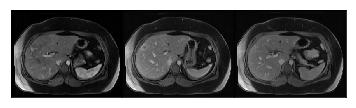

In [226]:
# Full imgs
cls = "fnh"
accnum = "12943872"
img = np.load(C.full_img_dir + "\\" + cls + "\\" + accnum + ".npy")
hf.plot_section_auto(img)

# Run CNN

In [ ]:
cbuild.overnight_run(C)

In [ ]:
#early_stopping = EarlyStopping(monitor='acc', min_delta=0.01, patience=4)
train_generator = cbuild.train_generator_func(C, train_ids, voi_df, avg_X2, n=5, n_art=3)
hist = model.fit_generator(train_generator, steps_per_epoch=200, epochs=15)#, callbacks=[early_stopping])

In [ ]:
n = 8
n_art = 0
steps_per_epoch = 200
epochs = 15
run_2d = False
batch_norm = True
non_imaging_inputs = True
f = [64,128,128,128]
dense_units = 100
dilation_rate = (1, 1, 1)
kernel_size = (3,3,3)
activation_type = 'elu'

t = time.time()

model = cbuild.build_cnn(C, 'adam', activation_type=activation_type,
        dilation_rate=dilation_rate, f=f,
        dense_units=dense_units, kernel_size=kernel_size)

model, X_test, Y_test, loss_hist, num_samples = cbuild.run_cnn(model, C, n=n, n_art=n_art,
            steps_per_epoch=steps_per_epoch, epochs=epochs, run_2d=run_2d)

Y_pred = model.predict(X_test)
y_true = np.array([max(enumerate(x), key=operator.itemgetter(1))[0] for x in Y_test])
y_pred = np.array([max(enumerate(x), key=operator.itemgetter(1))[0] for x in Y_pred])
print("6cls accuracy:", accuracy_score(y_true, y_pred))

y_true_simp, y_pred_simp, _ = cfunc.condense_cm(y_true, y_pred, C.classes_to_include)
print("3cls accuracy:", accuracy_score(y_true_simp, y_pred_simp))


# Situational

for img_fn in os.listdir(C.full_img_dir):
    try:
        cls = voi_df_art[voi_df_art["Filename"] == img_fn]["cls"].values[0]
        os.rename(C.full_img_dir + "\\" + img_fn, C.full_img_dir + "\\" + cls + "\\" + img_fn)
    except:
        continue

In [76]:
df = pd.read_excel(xls_name, sheetname)
df = drm.preprocess_df(df, C)
acc_nums = list(set(df['Patient E Number'].dropna().astype(str).tolist()))

In [ ]:
xls_name = 'Z:\\Prototype1d.xlsx'
img_dir = "Z:\\cholangio"
cls = 'cholangio'
sheetname="Cholangio"
df = pd.read_excel(xls_name, sheetname)
accnums = df[df['Run'] > C.run_num]['Patient E Number'].values

In [ ]:
for img_fn in sorted(set(voi_df[voi_df["cls"] == "cyst"]['Filename'])):
    img = np.load("full_imgs\\"+img_fn)
    if np.sum(img[img.shape[0]*1//5:img.shape[0]*4//5,img.shape[1]//5:img.shape[1]*2//5,:img.shape[2]//3]) > \
            np.sum(img[img.shape[0]*1//5:img.shape[0]*4//5,img.shape[1]//5:img.shape[1]*2//5,(img.shape[2]+1)*2//3:]):
        print(img_fn)

for cls in os.listdir(C.aug_dir):#classes_to_include:
    for img_fn in os.listdir(C.aug_dir + cls):
        if "refl" in img_fn:
            os.remove(C.aug_dir + cls + "\\" + img_fn)

img = img * 2 - 1

for cls in C.classes_to_include:
    fns = os.listdir(C.crops_dir + cls)
    for fn in fns:
        img = np.load(C.crops_dir + cls + "\\" + fn)
        img = img * 2 - 1
        np.save(C.crops_dir + cls + "\\" + fn, img)

for cls in C.classes_to_include:
    fns = os.listdir(C.orig_dir + cls)
    for fn in fns:
        img = np.load(C.orig_dir + cls + "\\" + fn)
        img = img * 2 - 1
        np.save(C.orig_dir + cls + "\\" + fn, img)

for cls in C.classes_to_include:
    fns = os.listdir(C.aug_dir + cls)
    for fn in fns:
        img = np.load(C.aug_dir + cls + "\\" + fn)
        img = img * 2 - 1
        np.save(C.aug_dir + cls + "\\" + fn, img)

for cls in os.listdir(C.aug_dir):#classes_to_include:
    for img_fn in os.listdir(C.aug_dir + cls):
        if "refl" not in img_fn:
            img = np.load(C.aug_dir + cls + "\\" + img_fn)
            aug_img = tr.generate_reflected_img(img)
            np.save(C.aug_dir + cls + "\\" + img_fn[:-4] + "-refl", aug_img)